In [1]:
import requests
import json
from datetime import date
today = "2020-07-20"
start_day = "2020-05-31"
response = requests.get(f"https://api.globe.gov/search/v1/measurement/protocol/measureddate/?protocols=mosquito_habitat_mapper&startdate={start_day}&enddate={today}&geojson=FALSE&sample=FALSE")

mosquito_data = response.json()["results"]

In [2]:
import pandas as pd
set_one = pd.read_csv("CEO/1-56.csv")
set_two = pd.read_csv("CEO/57-108.csv")
set_three = pd.read_csv("CEO/109-118.csv")
ceo_df = set_one.append(set_two, ignore_index=True)
ceo_df = ceo_df.append(set_three, ignore_index=True)


In [3]:
filled_ceo_df = ceo_df[ceo_df["ANALYSES"] > 0]
filled_ceo_df

,PLOT_ID,CENTER_LON,CENTER_LAT,SIZE_M,SHAPE,FLAGGED,ANALYSES,SAMPLE_POINTS,USER_ID,COMMON_SECUREWATCH_DATE,...,LAND COVER ELEMENTS:CULTIVATED VEGETATION,LAND COVER ELEMENTS:WATER>TREATED POOL,LAND COVER ELEMENTS:WATER>LAKE/PONDED/CONTAINER,LAND COVER ELEMENTS:WATER>RIVERS/STREAM,LAND COVER ELEMENTS:WATER>IRRIGATION DITCH,LAND COVER ELEMENTS:SHADOW,LAND COVER ELEMENTS:UNKNOWN,LAND COVER ELEMENTS:BARE GROUND,LAND COVER ELEMENTS:BUILDING,LAND COVER ELEMENTS:IMPERVIOUS SURFACE (NO BUILDING)
0,137373149,-84.711729,39.468432,100.0,square,False,1,121,treashurerichardson2003@gmail.com,NaN,...,0.0,0.0,0.0,0.0,0.0,5.785124,4.958678,0.000000,4.132231,6.611570
1,137373150,-84.711729,39.471899,100.0,square,False,1,121,treashurerichardson2003@gmail.com,NaN,...,0.0,0.0,0.0,0.0,0.0,13.223140,0.000000,41.322314,0.000000,0.000000
2,137373151,-84.711729,39.475366,100.0,square,False,1,121,gowtham.kadiyala01@gmail.com,NaN,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
36,137373185,-97.178299,32.846877,100.0,square,False,1,121,c_e_weller@icloud.com,NaN,...,0.0,0.0,0.0,0.0,0.0,0.000000,2.479339,0.000000,15.702479,48.760331
37,137373186,-97.178299,32.850650,100.0,square,False,1,121,c_e_weller@icloud.com,NaN,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.652893,36.363636,14.049587,14.049587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,137458533,-83.646971,41.369544,100.0,square,False,1,121,seyoungree@gmail.com,NaN,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,19.834711,8.264463
4244,137458534,-83.646971,41.372915,100.0,square,False,1,121,seyoungree@gmail.com,NaN,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,14.876033,39.669421
4245,137458535,-83.646971,41.376285,100.0,square,False,1,121,seyoungree@gmail.com,NaN,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,28.099174,59.504132
4246,137458536,-83.646971,41.379656,100.0,square,False,1,121,seyoungree@gmail.com,NaN,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,8.264463,10.743802


In [4]:
import requests
import json

with open('info.txt') as json_file:
    data = json.load(json_file)

response = requests.post('https://lpdaacsvc.cr.usgs.gov/appeears/api/login', auth=(data["username"], data["password"]))
token_response = response.json()
print(token_response)

{'token_type': 'Bearer', 'token': 'HaNUWfnF9lpsPg4AtJjzi_GKm5pOj-JQ76I2ybx32AsPUmEN64m6JEPTpI57Nr4Q4eaWixJf_brDRzNTD-iUSg', 'expiration': '2020-08-07T22:40:54Z'}


In [5]:
mosquito_data_df = pd.DataFrame(mosquito_data)
data_df_temp = pd.DataFrame(mosquito_data_df["data"].to_dict()).transpose()

mosquito_data_df = mosquito_data_df.join(data_df_temp)
mosquito_data_df.drop(["data"], axis=1)
mosquito_data_df.to_csv("results/CSV/mosquito_data.csv")
mosquito_data_df = mosquito_data_df.rename(columns = {"latitude" : "mosquito_latitude", "longitude" : "mosquito_longitude"})
mosquito_data_df

,protocol,measuredDate,createDate,updateDate,publishDate,organizationId,organizationName,siteId,siteName,countryName,...,mosquitohabitatmapperComments,mosquitohabitatmapperMosquitoPupae,mosquitohabitatmapperWaterSourcePhotoUrls,mosquitohabitatmapperDataSource,mosquitohabitatmapperLarvaFullBodyPhotoUrls,mosquitohabitatmapperMeasurementLatitude,mosquitohabitatmapperLastIdentifyStage,mosquitohabitatmapperWaterSourceType,mosquitohabitatmapperMosquitoHabitatMapperId,mosquitohabitatmapperMeasurementLongitude
0,mosquito_habitat_mapper,2020-06-10,2020-06-11T18:30:04,2020-06-11T18:30:04,2020-07-22T21:07:28,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,...,None,False,https://data.globe.gov/system/photos/2020/06/1...,GLOBE Observer App,None,39.2539,identify,container: artificial,23007,-77.1959
1,mosquito_habitat_mapper,2020-06-11,2020-06-11T18:30:03,2020-06-11T18:30:03,2020-07-22T21:07:28,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,...,None,False,https://data.globe.gov/system/photos/2020/06/1...,GLOBE Observer App,None,39.254,identify,container: artificial,23008,-77.1961
2,mosquito_habitat_mapper,2020-06-29,2020-06-29T15:00:05,2020-06-29T15:00:05,2020-07-22T21:07:28,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,...,None,False,https://data.globe.gov/system/photos/2020/06/2...,GLOBE Observer App,None,39.2541,identify,container: artificial,23951,-77.1961
3,mosquito_habitat_mapper,2020-07-09,2020-07-09T09:25:02,2020-07-09T09:25:02,2020-07-22T21:07:28,191867,Walailak University,44797,47PNK981553,Thailand,...,None,False,None,GLOBE Observer App,None,8.6421,identify-later,container: artificial,24500,99.8918
4,mosquito_habitat_mapper,2020-06-29,2020-06-29T15:00:03,2020-06-29T15:00:06,2020-07-22T21:07:28,13063641,GPM Satellite Mission,46273,18SUJ104472,United States,...,None,False,https://data.globe.gov/system/photos/2020/06/2...,GLOBE Observer App,None,39.254,identify,container: artificial,23949,-77.1962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,mosquito_habitat_mapper,2020-07-19,2020-07-25T08:40:02,2020-07-25T08:40:06,2020-07-25T08:50:00,163028,Princess Chulabhorn Science High School Trang,210609,47NNJ660330,Thailand,...,None,False,https://data.globe.gov/system/photos/2020/07/1...,GLOBE Observer App,None,7.5358,identify,container: artificial,25117,99.5989
2000,mosquito_habitat_mapper,2020-07-19,2020-07-25T08:40:02,2020-07-25T08:40:06,2020-07-25T08:50:00,163028,Princess Chulabhorn Science High School Trang,210609,47NNJ660330,Thailand,...,None,False,https://data.globe.gov/system/photos/2020/07/1...,GLOBE Observer App,None,7.5358,identify,container: artificial,25114,99.5989
2001,mosquito_habitat_mapper,2020-07-19,2020-07-25T08:40:02,2020-07-25T08:40:06,2020-07-25T08:50:00,163028,Princess Chulabhorn Science High School Trang,210609,47NNJ660330,Thailand,...,None,False,https://data.globe.gov/system/photos/2020/07/1...,GLOBE Observer App,None,7.5358,identify,container: artificial,25115,99.5989
2002,mosquito_habitat_mapper,2020-07-14,2020-07-28T18:30:03,2020-07-28T20:30:03,2020-07-28T20:40:00,17043304,United States of America Citizen Science,210981,18TWK492743,None,...,None,False,https://data.globe.gov/system/photos/2020/07/1...,GLOBE Observer App,None,40.4179,identify-later,still: lake/pond/swamp,25139,-74.4193


In [6]:
mm_keys = [ "measuredDate", "mosquito_latitude", "mosquito_longitude", "mosquitohabitatmapperLarvaeCount", "mosquitohabitatmapperMeasurementElevation"]
desired_mosquito_data = mosquito_data_df[mm_keys]
desired_mosquito_data = desired_mosquito_data.fillna(0)
desired_mosquito_data

,measuredDate,mosquito_latitude,mosquito_longitude,mosquitohabitatmapperLarvaeCount,mosquitohabitatmapperMeasurementElevation
0,2020-06-10,39.253437,-77.196178,0,0
1,2020-06-11,39.253437,-77.196178,0,0
2,2020-06-29,39.253437,-77.196178,0,0
3,2020-07-09,8.641206,99.891620,2,0
4,2020-06-29,39.253415,-77.197336,0,0
...,...,...,...,...,...
1999,2020-07-19,7.535569,99.598247,31,0
2000,2020-07-19,7.535569,99.598247,14,0
2001,2020-07-19,7.535569,99.598247,17,0
2002,2020-07-14,40.417872,-74.420067,0,0


In [7]:
desired_mosquito_data["mosquitohabitatmapperLarvaeCount"] = desired_mosquito_data["mosquitohabitatmapperLarvaeCount"].astype(int)
desired_mosquito_data

,measuredDate,mosquito_latitude,mosquito_longitude,mosquitohabitatmapperLarvaeCount,mosquitohabitatmapperMeasurementElevation
0,2020-06-10,39.253437,-77.196178,0,0
1,2020-06-11,39.253437,-77.196178,0,0
2,2020-06-29,39.253437,-77.196178,0,0
3,2020-07-09,8.641206,99.891620,2,0
4,2020-06-29,39.253415,-77.197336,0,0
...,...,...,...,...,...
1999,2020-07-19,7.535569,99.598247,31,0
2000,2020-07-19,7.535569,99.598247,14,0
2001,2020-07-19,7.535569,99.598247,17,0
2002,2020-07-14,40.417872,-74.420067,0,0


In [8]:
from math import radians, sin, cos, acos
from decimal import *
max_dist = 2500
def get_dist(slat, slong, elat, elong):
    
    dist = (sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slong - elong))
    if dist == 1.0000000000000002:
        dist = 1
    return 6371.01 * 1000 * acos(dist)
def in_range(latOne, lonOne, latTwo, lonTwo):
    try:
        return abs(round(get_dist(latOne, lonOne, latTwo, lonTwo))) <= max_dist
    except ValueError:
        print("death with: " + str(coordOne) + str(coordTwo))
        return False
def in_range_list(coordsOne, coordsTwo):
    return in_range(coordsOne[0], coordsOne[1], coordsTwo[0], coordsTwo[1])

In [9]:
groups = desired_mosquito_data.groupby(["mosquito_latitude", "mosquito_longitude"])

In [10]:
import sys
import os
import cgi
from IPython.display import display, HTML
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
class Mosquito_AOI:
    
    def __init__(self, coords, group):
        self.coords = coords
        self.group = pd.DataFrame(group).reset_index().drop("index", axis = 1)
        self.ceo = pd.DataFrame()
        self.appears = pd.DataFrame()
        self.mosquito = pd.DataFrame()
        self._gen_mosquito_data()
        self.name = self._coords_to_payload()
    
    def _gen_mosquito_data(self):
        self.mosquito = pd.DataFrame({
            "lat" : [self.coords[0]],
            "lon": [self.coords[1]],
            "mapper_count" : [self.group["mosquitohabitatmapperLarvaeCount"].sum()],
            "elevation" : [self.group["mosquitohabitatmapperMeasurementElevation"].mean()]})
        
    def display(self):
        display(self.combined_df())
    
    def _in_range(self, lat, lon):
        if in_range_list(self.coords, [lat, lon]):
                return True
    
    def get_near_CEO(self, ceo_df):
        temp_ceo = pd.DataFrame()
        has_ceo = False
        for index, row in ceo_df.iterrows():
            if self._in_range(ceo_df.loc[index, "CENTER_LAT"], ceo_df.loc[index, "CENTER_LON"]):
                temp_ceo = temp_ceo.append(row, ignore_index= True)
                has_ceo = True
                print("found one!")       
        self.ceo = pd.DataFrame(temp_ceo.mean(axis = 0)).transpose()
        return has_ceo
    
    def combined_df(self):
        return pd.concat([self.mosquito.reset_index(), self.ceo.reset_index()], axis = 1)
    
    def file_output(self):
        filepath = os.path.join(os.getcwd(), "results", self.coords)
        os.makedirs(filepath, exist_ok=True)
    
    def _coords_to_payload(self): 
        coordStr = f"{self.coords[0]}, {self.coords[1]}" 
        return coordStr      
        
class AOI_Manager:
    
    def __init__(self, groups = [], AOI_List = [], ceo_frame = pd.DataFrame()):
        self.AOI_List= AOI_List
        self.appears = pd.DataFrame()
        for coords, group in groups:
            self.AOI_List.append(Mosquito_AOI(coords, group))
        self.aoi_map = {str(aoi.coords): aoi.group for aoi in self.AOI_List}
        self.ceo_frame = ceo_frame
    
    def get_near_CEO(self, ceo_df):
        ceo_frame = pd.DataFrame()
        aoi_sublist = []
        for aoi in self.AOI_List:
            if aoi.get_near_CEO(ceo_df):
                ceo_frame = ceo_frame.append(aoi.combined_df(), ignore_index = True)
                aoi_sublist.append(aoi)
        display(ceo_frame)
        if not ceo_frame.empty:
            ceo_frame = ceo_frame.drop(["index", "ANALYSES","PLOT_ID","PL_PLOTID","SAMPLE_POINTS", "SIZE_M","TOTAL_SECUREWATCH_DATES"], axis = 1)
            curr_date = date.today()
            ceo_frame.to_csv(f"results/CSV/Results-{curr_date}.csv")
        return AOI_Manager(AOI_List = aoi_sublist, ceo_frame = ceo_frame) 
    
    def heat_map(self, filename):
        curr_date = date.today()
        fig = plt.figure()
        plt.rcParams.update({'font.size': 7})
        heatmap_data = self.correlation_matrix()
        plot = sns.heatmap(heatmap_data, annot = True, cmap= 'coolwarm')
        plt.savefig(f"results/images/{filename}.png")
        plt.show()
        plt.close(fig)
    
    def correlation_matrix(self):
        columns = self.ceo_frame.columns.str.contains("LAND COVER ELEMENTS:")
        return self.ceo_frame.corr().loc[columns, "mapper_count"].to_frame().dropna()
    
    def mosquito_threshold(self, min_count):
        good_list = []
        for aoi in self.AOI_List:
            if aoi.mosquito.loc[0,"mapper_count"] >= min_count:
                good_list.append(aoi)
        return AOI_Manager(AOI_List = good_list)
    
    def create_mosquito_csv(self):
        mosquito_df = pd.DataFrame()
        for aoi in self.AOI_List:
            mosquito_df = mosquito_df.append(aoi.mosquito, ignore_index= True)
        mosquito_df.to_csv("results/CSV/mosquito_csv.csv")
    
    def appears_from_file(self, path):
        self.appears = pd.read_csv(path)
        self.appears.apply(pd.to_numeric, errors = "ignore")
        self.appears.replace(-9999.0, value = np.nan, inplace = True)
        self.appears.replace(254.0, value = np.nan, inplace= True)
        self.appears.to_csv(path)
    
    def get_appears(self): 
        payload = [aoi.name for aoi in self.AOI_List]
        token = token_response['token']
        def _create_appears_request():
            task = {
                'task_type': 'point',
                'task_name': "Appears Request",
                'startDate': start_day,
                'endDate': today,
                'layer': [
                    'SPL3SMP.006,Soil_Moisture_Retrieval_Data_AM_soil_moisture',
                    'SPL3SMP.006,Soil_Moisture_Retrieval_Data_AM_surface_temperature',               
                ],
                'coordinate': payload
            }

            # submit the task request
            response = requests.post(
                'https://lpdaacsvc.cr.usgs.gov/appeears/api/task',
                params=task,  
                headers={'Authorization': 'Bearer {0}'.format(token)})
            try:
                return response.json()["task_id"]
            except KeyError:
                print(response.content)
                
        def _wait_appears(task_id):
            status = ""
            while status != "done":
                time.sleep(30)
                response = requests.get(
                    'https://lpdaacsvc.cr.usgs.gov/appeears/api/status/{0}'.format(task_id), 
                    headers={'Authorization': 'Bearer {0}'.format(token)})
                status_response = response.json()
                try:
                    status = status_response["status"]
                except KeyError:
                    status = "processing"
                print(status)
        
        def _download_file(task_id):
            response = requests.get('https://lpdaacsvc.cr.usgs.gov/appeears/api/bundle/{0}'.format(task_id))
            bundle_response = response.json()

            # get a stream to the bundle file
            file_id = bundle_response["files"][0]["file_id"]
            response = requests.get(
                'https://lpdaacsvc.cr.usgs.gov/appeears/api/bundle/{0}/{1}'.format(task_id, file_id),
                stream=True)

            # parse the filename from the Content-Disposition header
            content_disposition = cgi.parse_header(response.headers['Content-Disposition'])[1]
            filename = os.path.basename(content_disposition['filename'])

            # create a destination directory to store the file in
            dest_dir = os.path.join(os.getcwd(), "results", "Appears Data")
            filepath = os.path.join(dest_dir, filename)
            os.makedirs(os.path.dirname(filepath), exist_ok=True)

            # write the file to the destination directory
            with open(filepath, 'wb') as f:
                for data in response.iter_content(chunk_size=8192):
                    f.write(data)
            return str(filepath)
        
        task_id = _create_appears_request()
        print(f"Task Request made: {task_id}")
        _wait_appears(task_id)
        print("completed waiting")
        path = _download_file(task_id)
        print("downloaded files")
        self.appears_from_file(path)
    
    def graph_appears(self):
        def _format_name(layer):
            words = layer.split("_")
            name = ""
            for word in words:
                name += word.capitalize() + " "
            return name
        def _make_graph(mosquito_group, smap_group, layer, name):
            smap_data = group[["Date", f"SPL3SMP_006_Soil_Moisture_Retrieval_Data_AM_{layer}"]].dropna()
            smap_data = smap_data.rename(columns = {f"SPL3SMP_006_Soil_Moisture_Retrieval_Data_AM_{layer}" : layer, "Date" : "measuredDate"})
            merged_data = pd.merge(mosquito_group, smap_data, on = ["measuredDate"], how = "outer", sort = True)
            merged_data["mosquitohabitatmapperLarvaeCount"] = merged_data["mosquitohabitatmapperLarvaeCount"].fillna(0)
            merged_data.index = merged_data["measuredDate"]
            
            filepath = os.path.join(os.getcwd(), "results", "images", f"{name}-{layer}.png")
            plot_name = _format_name(layer)
            fig = plt.figure();
            ax1 = merged_data.mosquitohabitatmapperLarvaeCount.plot(label = "Larvae Count")
            ax1.set_ylabel("Larvae Count")
            ax2 = merged_data[layer].dropna().plot(secondary_y = True, label = plot_name)
            ax2.set_ylabel(plot_name)
            h1, l1 = ax1.get_legend_handles_labels()
            h2, l2 = ax2.get_legend_handles_labels()
            plt.legend(h1+h2, l1+l2, loc=0)
            fig.autofmt_xdate()
            plt.title(f'{name} Mosquito Larvae and {plot_name}')
            plt.savefig(filepath)
            plt.close(fig)

        layers = ["soil_moisture", "surface_temperature"]
        # group by coords
        groups = self.appears.groupby(["Latitude", "Longitude"])
        for coords, group in groups:
            name = f"({round(coords[0], 6)}, {round(coords[1], 6)})"
            try:
                mosquito_group = self.aoi_map[name]
                for layer in layers:
                    _make_graph(mosquito_group, group, layer, name)
            except KeyError:
                print(f"{coords} failed")
        

In [11]:
manager = AOI_Manager(groups)


In [12]:
mosquito_manager = manager.mosquito_threshold(0)

In [13]:
mosquito_manager.create_mosquito_csv()

In [14]:
coincident = mosquito_manager.get_near_CEO(filled_ceo_df)

found one!
found one!
found one!
found one!
found one!
found one!
found one!
found one!
found one!
found one!
found one!
found one!
found one!
found one!
found one!
found one!


,index,lat,lon,mapper_count,elevation,index,ANALYSES,CENTER_LAT,CENTER_LON,COMMON_SECUREWATCH_DATE,...,LAND COVER ELEMENTS:UNKNOWN,LAND COVER ELEMENTS:WATER>IRRIGATION DITCH,LAND COVER ELEMENTS:WATER>LAKE/PONDED/CONTAINER,LAND COVER ELEMENTS:WATER>RIVERS/STREAM,LAND COVER ELEMENTS:WATER>TREATED POOL,PLOT_ID,PL_PLOTID,SAMPLE_POINTS,SIZE_M,TOTAL_SECUREWATCH_DATES
0,0,18.027425,-67.148520,0,0.0,0,1.0,18.027135,-67.148609,NaN,...,0.0,0.0,0.0,0.000000,0.000000,137373788.0,1828.0,121.0,100.0,0.0
1,0,29.480144,-98.470846,0,0.0,0,1.0,29.480348,-98.470445,NaN,...,0.0,0.0,0.0,0.000000,0.000000,137375476.0,6524.0,121.0,100.0,0.0
2,0,29.781019,-95.431896,5,0.0,0,1.0,29.780713,-95.432338,NaN,...,0.0,0.0,0.0,0.000000,0.000000,137373513.0,1105.0,121.0,100.0,0.0
3,0,29.781038,-95.430862,0,0.0,0,1.0,29.780713,-95.430092,NaN,...,0.0,0.0,0.0,0.000000,0.000000,137373516.0,1108.0,121.0,100.0,0.0
4,0,29.781057,-95.429829,0,0.0,0,1.0,29.780713,-95.430092,NaN,...,0.0,0.0,0.0,0.000000,0.000000,137373516.0,1108.0,121.0,100.0,0.0
5,0,29.781076,-95.428795,0,0.0,0,1.0,29.780713,-95.430092,NaN,...,0.0,0.0,0.0,0.000000,0.000000,137373516.0,1108.0,121.0,100.0,0.0
6,0,30.301337,-97.888287,1,0.0,0,1.0,30.301612,-97.887737,NaN,...,0.0,0.0,0.0,0.000000,0.000000,137374171.0,2915.0,121.0,100.0,0.0
7,0,30.364600,-97.900059,0,0.0,0,1.0,30.364757,-97.900144,NaN,...,0.0,0.0,0.0,0.000000,0.000000,137374788.0,4620.0,121.0,100.0,0.0
8,0,33.094165,-96.739116,0,0.0,0,1.0,33.093944,-96.740409,NaN,...,0.0,0.0,0.0,0.000000,0.826446,137374070.0,2622.0,121.0,100.0,0.0
9,0,33.097771,-96.739024,6,0.0,0,1.0,33.097707,-96.738163,NaN,...,0.0,0.0,0.0,0.000000,0.000000,137374074.0,2626.0,121.0,100.0,0.0


In [16]:
# request to automatically get data sometimes takes long so this lets us use the CSV once AppEEARS finishes the request
coincident.appears_from_file("results/Appears Data/appears-request-SPL3SMP-006-results.csv")

In [15]:
coincident.get_appears()


Task Request made: 4f70fea8-74af-47bd-b82e-98d7e8e07dbe
pending
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
done
completed waiting
downloaded files


In [16]:
coincident.graph_appears()

In [17]:
coincident.correlation_matrix()

,mapper_count
LAND COVER ELEMENTS:BARE GROUND,-0.158726
LAND COVER ELEMENTS:BUILDING,-0.288785
LAND COVER ELEMENTS:BUSH/SCRUB,-0.034240
LAND COVER ELEMENTS:CULTIVATED VEGETATION,-0.121735
LAND COVER ELEMENTS:GRASS,-0.299921
LAND COVER ELEMENTS:IMPERVIOUS SURFACE (NO BUILDING),-0.211871
LAND COVER ELEMENTS:SHADOW,-0.256117
LAND COVER ELEMENTS:TREES_CANOPYCOVER,0.440466
LAND COVER ELEMENTS:WATER>RIVERS/STREAM,-0.086345
LAND COVER ELEMENTS:WATER>TREATED POOL,-0.154887


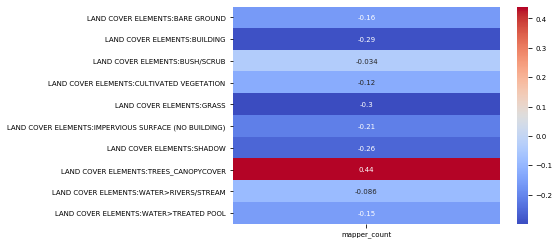

In [18]:
coincident.heat_map("Raw Heat Map")

In [19]:
coincident.ceo_frame 

,lat,lon,mapper_count,elevation,CENTER_LAT,CENTER_LON,COMMON_SECUREWATCH_DATE,FLAGGED,LAND COVER ELEMENTS:BARE GROUND,LAND COVER ELEMENTS:BUILDING,...,LAND COVER ELEMENTS:CULTIVATED VEGETATION,LAND COVER ELEMENTS:GRASS,LAND COVER ELEMENTS:IMPERVIOUS SURFACE (NO BUILDING),LAND COVER ELEMENTS:SHADOW,LAND COVER ELEMENTS:TREES_CANOPYCOVER,LAND COVER ELEMENTS:UNKNOWN,LAND COVER ELEMENTS:WATER>IRRIGATION DITCH,LAND COVER ELEMENTS:WATER>LAKE/PONDED/CONTAINER,LAND COVER ELEMENTS:WATER>RIVERS/STREAM,LAND COVER ELEMENTS:WATER>TREATED POOL
0,18.027425,-67.148520,0,0.0,18.027135,-67.148609,NaN,0.0,27.272727,9.090909,...,0.000000,11.570248,2.479339,16.528926,33.057851,0.0,0.0,0.0,0.000000,0.000000
1,29.480144,-98.470846,0,0.0,29.480348,-98.470445,NaN,0.0,4.132231,4.958678,...,6.611570,12.396694,14.049587,0.000000,57.851240,0.0,0.0,0.0,0.000000,0.000000
2,29.781019,-95.431896,5,0.0,29.780713,-95.432338,NaN,0.0,7.024793,21.074380,...,0.000000,11.983471,40.082645,11.570248,7.851240,0.0,0.0,0.0,0.000000,0.000000
3,29.781038,-95.430862,0,0.0,29.780713,-95.430092,NaN,0.0,14.049587,42.148760,...,0.000000,9.090909,7.438017,18.181818,9.090909,0.0,0.0,0.0,0.000000,0.000000
4,29.781057,-95.429829,0,0.0,29.780713,-95.430092,NaN,0.0,14.049587,42.148760,...,0.000000,9.090909,7.438017,18.181818,9.090909,0.0,0.0,0.0,0.000000,0.000000
5,29.781076,-95.428795,0,0.0,29.780713,-95.430092,NaN,0.0,14.049587,42.148760,...,0.000000,9.090909,7.438017,18.181818,9.090909,0.0,0.0,0.0,0.000000,0.000000
6,30.301337,-97.888287,1,0.0,30.301612,-97.887737,NaN,0.0,3.305785,0.000000,...,0.000000,0.000000,0.000000,1.652893,95.041322,0.0,0.0,0.0,0.000000,0.000000
7,30.364600,-97.900059,0,0.0,30.364757,-97.900144,NaN,0.0,0.000000,0.000000,...,20.661157,0.000000,47.933884,14.876033,16.528926,0.0,0.0,0.0,0.000000,0.000000
8,33.094165,-96.739116,0,0.0,33.093944,-96.740409,NaN,0.0,0.000000,37.190083,...,0.000000,19.834711,19.008264,0.000000,23.140496,0.0,0.0,0.0,0.000000,0.826446
9,33.097771,-96.739024,6,0.0,33.097707,-96.738163,NaN,0.0,0.000000,22.727273,...,0.000000,32.231405,27.685950,0.000000,17.355372,0.0,0.0,0.0,0.000000,0.000000


In [20]:
# Removes concentrated point
coincident.ceo_frame= coincident.ceo_frame.drop(10, axis = 0)

In [21]:
coincident.correlation_matrix()

,mapper_count
LAND COVER ELEMENTS:BARE GROUND,-0.211878
LAND COVER ELEMENTS:BUILDING,0.041513
LAND COVER ELEMENTS:BUSH/SCRUB,0.594643
LAND COVER ELEMENTS:CULTIVATED VEGETATION,-0.190380
LAND COVER ELEMENTS:GRASS,0.567847
LAND COVER ELEMENTS:IMPERVIOUS SURFACE (NO BUILDING),0.516583
LAND COVER ELEMENTS:SHADOW,-0.157275
LAND COVER ELEMENTS:TREES_CANOPYCOVER,-0.283739
LAND COVER ELEMENTS:WATER>RIVERS/STREAM,-0.134636
LAND COVER ELEMENTS:WATER>TREATED POOL,-0.243124


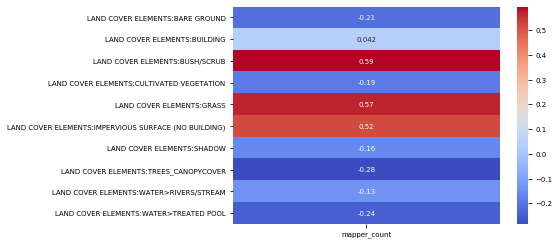

In [22]:
coincident.heat_map("Updated Heat Map")

In [23]:
# logout of AppEEARS
token = token_response['token']
response = requests.post(
    'https://lpdaacsvc.cr.usgs.gov/appeears/api/logout', 
    headers={'Authorization': 'Bearer {0}'.format(token)})
print(response.status_code)

204
